# 02_part2_polyreg.ipynb
## Regresión polinómica multivariable para luminosidad estelar

En este notebook se extiende el modelo para capturar efectos no lineales
y la interacción entre masa y temperatura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

### Dataset y visualización
Se consideran dos variables físicas: masa (M) y temperatura efectiva (T).

In [2]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

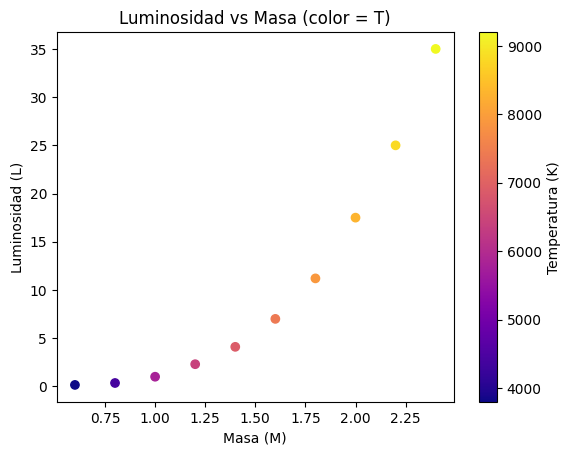

In [3]:
plt.scatter(M, L, c=T, cmap='plasma')
plt.colorbar(label='Temperatura (K)')
plt.xlabel('Masa (M)')
plt.ylabel('Luminosidad (L)')
plt.title('Luminosidad vs Masa (color = T)')
plt.show()

### Feature engineering
Se construyen matrices de diseño con complejidad creciente:
M1 = [M, T]
M2 = [M, T, M²]
M3 = [M, T, M², M·T]

In [4]:
X_M1 = np.column_stack([M, T])
X_M2 = np.column_stack([M, T, M**2])
X_M3 = np.column_stack([M, T, M**2, M*T])

### Normalización
Las features se estandarizan para evitar inestabilidad numérica durante el entrenamiento.

In [5]:
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return (X - mu) / sigma, mu, sigma

X1n, mu1, s1 = normalize(X_M1)
X2n, mu2, s2 = normalize(X_M2)
X3n, mu3, s3 = normalize(X_M3)

### Modelo, costo y gradientes
Se utiliza el modelo L_hat = X @ w + b con MSE como función de costo.

In [6]:
def predict(X, w, b):
    return X @ w + b

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def gradients(X, y, w, b):
    N = len(y)
    error = (X @ w + b) - y
    dw = (2/N) * X.T @ error
    db = (2/N) * np.sum(error)
    return dw, db

### Entrenamiento y comparación de modelos

In [7]:
def train(X, y, lr=0.01, epochs=5000):
    w = np.zeros(X.shape[1])
    b = 0.0
    losses = []
    for _ in range(epochs):
        dw, db = gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse(y, predict(X, w, b)))
    return w, b, losses

w1, b1, l1 = train(X1n, L)
w2, b2, l2 = train(X2n, L)
w3, b3, l3 = train(X3n, L)

print('M1 loss:', l1[-1])
print('M2 loss:', l2[-1])
print('M3 loss:', l3[-1])

M1 loss: 7.811058207023363
M2 loss: 1.7524508764164053
M3 loss: 1.7399952356734931


### Importancia de la interacción M·T

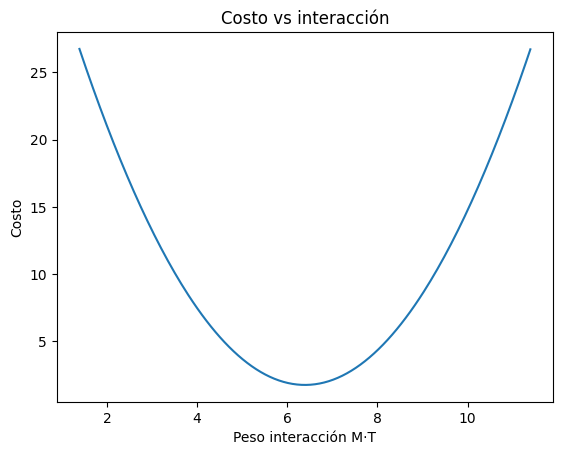

In [8]:
vals = np.linspace(w3[3]-5, w3[3]+5, 200)
costs = []
for v in vals:
    w_tmp = w3.copy()
    w_tmp[3] = v
    costs.append(mse(L, predict(X3n, w_tmp, b3)))

plt.plot(vals, costs)
plt.xlabel('Peso interacción M·T')
plt.ylabel('Costo')
plt.title('Costo vs interacción')
plt.show()

### Inferencia
Se predice la luminosidad de una nueva estrella con M=1.3 y T=6600 K.

In [9]:
M_new, T_new = 1.3, 6600
X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])
X_new_n = (X_new - mu3) / s3
L_pred = X_new_n @ w3 + b3
print('Luminosidad predicha:', L_pred)

Luminosidad predicha: 2.5393381994833586
